# Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned10' # The purpose of defining a custom name is to differentiate the model from others and make it easier to reference in the future.
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' # defining the name of the pre-trained model that we will be using as a starting point for our custom model. SSD (Single Shot Detection) model
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz' #pre-trained model from the TensorFlow model zoo
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }
# This code segment defines paths to various directories and files required for training the sign language model. 

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
if os.name=='nt':
    #!pip install wget
    import wget

In [41]:
# tmai
#if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
#    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [42]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
#!python {VERIFICATION_SCRIPT}

In [43]:
# Install Tensorflow Object Detection 
#if os.name=='posix':  
#    !apt-get install protobuf-compiler
#    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
#if os.name=='nt':
#    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
#    wget.download(url)
#    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
#    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
#    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
#    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
#    !cd Tensorflow/models/research/slim && pip install -e . 

In [7]:
import object_detection

In [45]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- ---------------------------------------------------------------------------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
apache-beam                   2.44.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2.9.1
backcall                      0.2.0
backports.functools-

In [46]:
#tmai
#if os.name =='posix':
#    !wget {PRETRAINED_MODEL_URL}
#    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
#if os.name == 'nt':
#    wget.download(PRETRAINED_MODEL_URL)
#    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

debugpy                       1.5.1
decorator                     5.1.1
defusedxml                    0.7.1
diff-match-patch              20200713
dill                          0.3.1.1
distributed                   2022.7.0
dm-tree                       0.1.8
docopt                        0.6.2
docutils                      0.18.1
entrypoints                   0.4
et-xmlfile                    1.1.0
etils                         1.0.0
fastavro                      1.7.0
fasteners                     0.18
fastjsonschema                2.16.2
filelock                      3.6.0
flake8                        4.0.1
Flask                         1.1.2
flatbuffers                   23.1.4
fonttools                     4.25.0
fsspec                        2022.7.1
future                        0.18.2
gast                          0.4.0
gensim                        4.1.2
gin-config                    0.5.0
glob2                         0.7
google-api-core               2.11.0
google-api-pytho

# Create Label Map

In [8]:
labels = [{'name':'Accident', 'id':1}, {'name':'Bones', 'id':2}, {'name':'Broken', 'id':3}, {'name':'CarAccident', 'id':4}, {'name':'Emergency', 'id':5}, {'name':'Fire', 'id':6}, {'name':'Hello', 'id':7}, {'name':'Help', 'id':8}, {'name':'No', 'id':9}, {'name':'Yes', 'id':10}]
#contains a dictionary for each label that we will be training the model on. Each dictionary contains the label's name and its corresponding ID.
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')
        
# LABELMAP will be used to map the label names to their corresponding IDs during training.

# Create TF records

In [30]:
# tmai
#if not os.path.exists(files['TF_RECORD_SCRIPT']):
    #!git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [32]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# Copy Model Config to Training Folder

In [33]:
#if os.name =='posix':
#    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# Update Config For Transfer Learning

In [34]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
#required libraries

In [35]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [36]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [37]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [38]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [39]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Train the model

In [9]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=50000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [11]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned10 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned10\pipeline.config --num_train_steps=50000


In [60]:
# tmai !{command}

# Evaluate the Model

In [12]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [13]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned10 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned10\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned10


In [68]:
# tensorboard --logdir=. #this is when you go into the train/eval folders
# tmai !{command}
!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.81s).
Accumulating evaluation results...
DONE (t=0.82s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.877
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.998
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.991
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.879
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.845
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.901
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.901


2023-04-02 21:46:52.543713: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-02 21:46:52.544377: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 21:47:06.655890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-04-02 21:47:06.656005: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-02 21:47:06.665210: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-235TF02R
2023-04-02 21:47:06.665504: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-235TF02R
W0402 21:47:06.669219 18980 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1

 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.903


    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
INFO:tensorflow:Finished eval step 100
I0402 21:49:06.352877 18980 model_lib_v2.py:966] Finished eval step 100
INFO:tensorflow:Finished eval step 200
I0402 21:49:23.517104 18980 model_lib_v2.py:966] Finished eval step 200
INFO:tensorflow:Performing evaluation on 233 images.
I0402 21:49:29.556817 18980 coco_evaluation.py:293] Performing evaluation on 233 images.
INFO:tensorflow:Loading and preparing annotation results...
I0402 21:49:29.55

# Load Train Model From Checkpoint

In [14]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [15]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-45')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


# Detect from an Image

In [16]:
#tmai !pip install cv2-tools
#!pip uninstall opencv-python
#!pip uninstall opencv-contrib-python

#!pip install opencv-contrib-python
#!pip install opencv-python

#!pip uninstall object-detection
#!pip install object-detection

import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [18]:
#tmai IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'accident1.a389a018-9792-11ed-94d7-81eb9cfde3de')
#IMAGE_PATH = os.path.join('C:\\Users\\sophi\\OneDrive\\Desktop\\TSA\\SignLang\\TFODCourse\\Tensorflow\\workspace\\images', 'test', 'accident1.a8047927-97e0-11ed-8ec9-81eb9cfde3de')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'accident1.a389a018-9792-11ed-94d7-81eb9cfde3de.jpg')

IMAGE_PATH = Tensorflow\workspace\images\test\accident1.a389a018-9792-11ed-94d7-81eb9cfde3de.jpg
img: 
[[[150 164 163]
  [149 163 162]
  [149 165 164]
  ...
  [218 223 214]
  [216 221 212]
  [215 220 211]]

 [[149 163 162]
  [148 162 161]
  [149 163 162]
  ...
  [218 223 214]
  [219 222 213]
  [216 221 212]]

 [[151 163 163]
  [150 164 163]
  [148 162 161]
  ...
  [221 224 215]
  [223 224 215]
  [220 223 214]]

 ...

 [[123 113  66]
  [116 107  63]
  [115 106  68]
  ...
  [ 82  85  83]
  [ 84  87  85]
  [ 81  84  82]]

 [[127 114  68]
  [117 106  62]
  [112 101  63]
  ...
  [ 78  87  84]
  [ 79  87  86]
  [ 79  87  86]]

 [[117 104  58]
  [116 105  61]
  [110  96  60]
  ...
  [ 73  84  81]
  [ 76  87  85]
  [ 74  85  83]]]
image_np: 
[[[150 164 163]
  [149 163 162]
  [149 165 164]
  ...
  [218 223 214]
  [216 221 212]
  [215 220 211]]

 [[149 163 162]
  [148 162 161]
  [149 163 162]
  ...
  [218 223 214]
  [219 222 213]
  [216 221 212]]

 [[151 163 163]
  [150 164 163]
  [148 162 161]


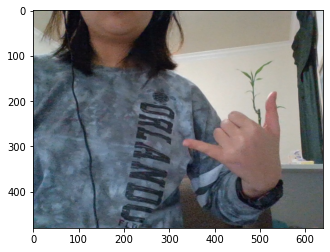

In [19]:
print ("IMAGE_PATH = " + IMAGE_PATH)
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR)
print ("img: ")
print (img)

image_np = np.array(img)
print ("image_np: ")
print (image_np)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
print ("input_tensor: ")
print (input_tensor)

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real Time Detections from your Webcam

In [20]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break